## Comparison on my solution with one of the topranker solution

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss

In [2]:
sub = pd.read_excel("model_rf_cv10_v1.xlsx", index_col=None)
sub.head()

,no,yes
0,0.572985,0.427015
1,0.729138,0.270862
2,0.936492,0.063508
3,0.838990,0.161010
4,0.729138,0.270862


In [3]:
sub_topranker = pd.read_excel("Output.xlsx", index_col=None)
sub_topranker.head()

,no,yes
0,0.501344,0.498656
1,0.720781,0.279219
2,0.933769,0.066231
3,0.860204,0.139796
4,0.685088,0.314912


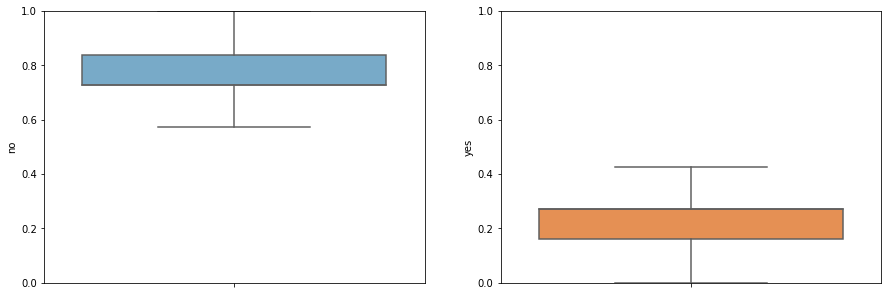

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(y='no', data=sub, ax=ax[0], palette='Blues')
sns.boxplot(y='yes', data=sub, ax=ax[1], palette='Oranges')
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
plt.show()

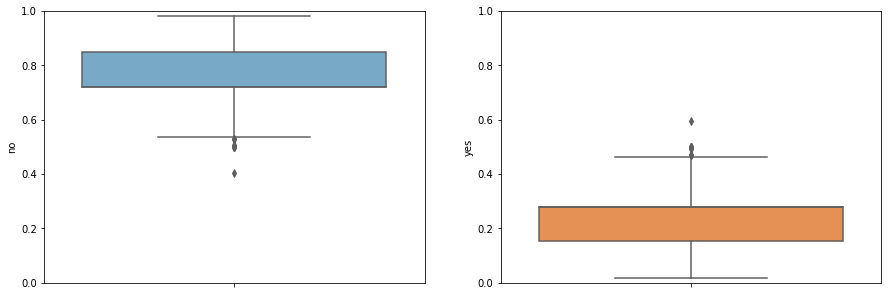

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(y='no', data=sub_topranker, ax=ax[0], palette='Blues')
sns.boxplot(y='yes', data=sub_topranker, ax=ax[1], palette='Oranges')
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
plt.show()

* the above plots look similar. Let us compare by taking a difference in the numbers.

In [6]:
sub_diff = pd.DataFrame(columns=['no','yes'])
sub_diff['no'] = (sub['no'] - sub_topranker['no'])
sub_diff['yes'] = (sub['yes'] - sub_topranker['yes'])
sub_diff.head()

,no,yes
0,0.071641,-0.071641
1,0.008357,-0.008357
2,0.002723,-0.002723
3,-0.021214,0.021214
4,0.044051,-0.044051


In [7]:
sub_diff.describe()

,no,yes
count,382.000000,382.000000
mean,0.010154,-0.010154
std,0.031784,0.031784
min,-0.132367,-0.169939
25%,-0.008515,-0.018257
50%,0.008357,-0.008357
75%,0.018257,0.008515
max,0.169939,0.132367


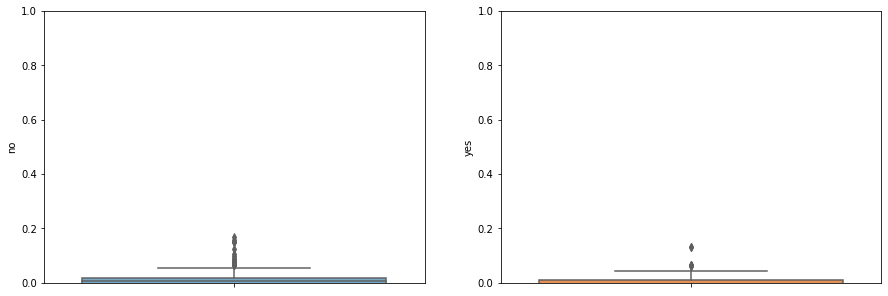

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(y='no', data=sub_diff, ax=ax[0], palette='Blues')
sns.boxplot(y='yes', data=sub_diff, ax=ax[1], palette='Oranges')
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
plt.show()

According to about stats, my Solution probability is different from topranker's solution by an average of 0.010154 for both the classes.

But on the final Leaderboard,
Topranker's Final Score: <b>0.48294</b>
My Final Score: <b>0.64389</b>
This is a difference of <b>0.1609</b>

Why do we have such a discrepancy? This is because of an interesting finding.

### Explanation with a simple example

In [9]:
sample = pd.DataFrame([[0,1], [0, 1], [1, 0], [1, 0]], columns=['no','yes'])
sample

,no,yes
0,0,1
1,0,1
2,1,0
3,1,0


In [10]:
print("logloss is {}".format(log_loss([1,0,0,0], sample.values)))

logloss is 8.634694098727671


Since Log loss is undefined for p=0 or p=1, so the probabilities are clipped. This is done by sklearn by using a parameter eps as shown below

<i>log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None,
             labels=None)</i>

#### if we tweak this parameter and set it to let us say 0.01

In [11]:
print("logloss is {}".format(log_loss([1,0,0,0], sample.values, eps=0.01)))

logloss is 1.1588302983871486


Now the above logloss looks correct!!!!. The issue is with the default parameter value of eps. 
It should have been 0.01 instead of 1e-15. 

Let us verify if such scenarios occur for the above two submissions.

In [12]:
pct = ((sub['no']==1)&(sub['yes']==0.0)).mean()*100
print("my submission {:0.0f}% records have 1 and 0 combination in the probabilties".format(pct))

pct = ((sub_topranker['no']==1)&(sub_topranker['yes']==0.0)).mean()*100
print("topranker submission {:0.0f}% records have 1 and 0 combination in the probabilties".format(pct))

my submission 10% records have 1 and 0 combination in the probabilties
topranker submission 0% records have 1 and 0 combination in the probabilties


<i>I found pattern for some records in the dataset and manually assigned the probabilites. The CV score was always consistent with public LB. The worst part was that such records never showed up in the public LB.

Planning to raise an issue with sklearn team and also <b>Good Learning for next time</i>